# CMSE 201 Final Project

### <p style="text-align: right;"> Shadman Chowdhury</p>

## Introduction

Christiano Ronaldo and Lionel Messi are two of the biggest athletes in the entire world with a rivalry that is unmatched. It has been some time since both of these players have played against one another directly, but have participated in the same competitions. La Liga is one of the competitions in the Spanish football league system that both Messi and Ronaldo have played in. Messi has been participating in La Liga for quite some time now and played until the 2020-2021 season. On the other hand, Ronaldo's La Liga career was cut short at just the 2017-2018 season. I hope to use predictive modelling in order to see how Ronaldo would perform hypothetically in comparison to Messi.

### Research Question: Between Ronaldo and Messi, who would have scored the most number of career goals in Laliga and the Champions Leauge? 
- Most number of assists?
- What about Neymar Jr?


### Importing libraries and function

In [1]:
#import libs
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
#Function to get player statistics for various tournaments
def player_info(player,tournament,stat):
    if tournament=='Laliga':
        if stat=='goal':
            stats='Liga_Goals'
        elif stat=='assist':
            stats='Liga_Asts'
        elif stat=='Season':
            stats='Season'
        elif stat=='Time':
            stats='Liga_Mins'
        goal='Liga_Goals'
        liga=pd.read_csv('Laliga.csv',delimiter=';',skiprows=1,)
        mask1=liga['Player']==player
        player_liga = liga[mask1]
        player_liga_stat=player_liga[stats].values
        return player_liga_stat
    
    elif tournament=='Champions League':
        if stat=='goal':
            stats='CL_Goals'
        elif stat=='assist':
            stats='CL_Asts'
        elif stat=='Season':
            stats='Season'
        elif stat=='Time':
            stats='CL_Mins'
        CL=pd.read_csv('Champ_league.csv',delimiter=';',skiprows=1)
        mask1=CL['Player']==player
        player_CL = CL[mask1]
        player_CL_stat=player_CL[stats].values
        return player_CL_stat

    
def neymar_stats(tournament,stat):
    data=pd.read_csv('Neymar_stat.csv',delimiter=';',skiprows=1)
    if tournament=='Laliga':
        mask1=data['Tournament']=='Liga'
        neymar_liga = data[mask1]
        neymar_liga_stat=neymar_liga[stat].values
        return neymar_liga_stat
    
    elif tournament=='Champions League':
        mask1=data['Tournament']=='CL'
        neymar_CL = data[mask1]
        neymar_CL_stat=neymar_CL[stat].values
        return neymar_CL_stat
    


# LaLiga: Ronaldo V Messi

Text(0, 0.5, 'Goals')

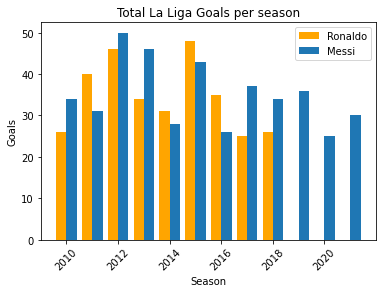

In [3]:
ronaldo_liga_goal=player_info('Ronaldo','Laliga','goal')
messi_liga_goal=player_info('Messi','Laliga','goal')
yearM=player_info('Messi','Laliga','Season')
yearR=player_info('Ronaldo','Laliga','Season')

#plotting bar graph of Ronaldo and Messi Liga goals
plt.bar(yearR -0.2, ronaldo_liga_goal, width=0.4, label = 'Ronaldo',color='orange')
plt.bar(yearM +0.2, messi_liga_goal, width=0.4, label = 'Messi')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.legend()
plt.title('Total La Liga Goals per season')
plt.xlabel('Season')
plt.ylabel('Goals')

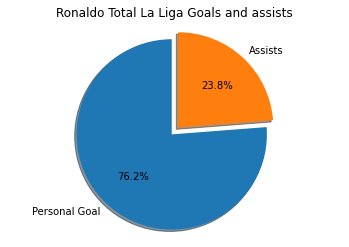

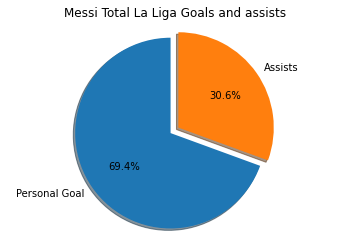

In [4]:
ronaldo_liga_assist_total=(player_info('Ronaldo','Laliga','assist')).sum()
messi_liga_assist_total=(player_info('Messi','Laliga','assist')).sum()

labels = 'Personal Goal', 'Assists'

sizes = (ronaldo_liga_goal.sum(),ronaldo_liga_assist_total)
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Ronaldo Total La Liga Goals and assists')

sizes2 = (messi_liga_goal.sum(),messi_liga_assist_total)
explode = (0.1, 0)

fig1, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title('Messi Total La Liga Goals and assists')
ax2.axis('equal')
plt.show()


## Old Curve Fitting Model

Text(0, 0.5, 'Goal/Hour')

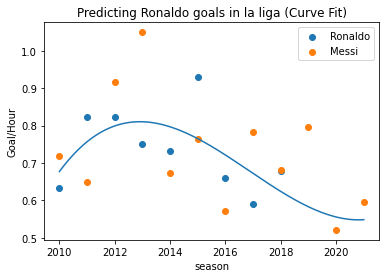

In [5]:
def eq1(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

ratio_ronaldo=ronaldo_liga_goal/(player_info('Ronaldo','Laliga','Time'))
ratio_messi=messi_liga_goal/(player_info('Messi','Laliga','Time'))

popt, pcov = curve_fit(eq1, yearR,ratio_ronaldo) 
A_expected = popt[0]   
B_expected = popt[1] 
C_expected = popt[2]
D_expected = popt[3]
x_fine = np.linspace(min(yearM),max(yearM),150) 
y_expected = eq1(x_fine, A_expected, B_expected,C_expected,D_expected)*60 
plt.plot(x_fine, y_expected)
plt.scatter(yearR,ratio_ronaldo*60,label='Ronaldo')
plt.scatter(yearM,ratio_messi*60,label='Messi')
plt.legend()
plt.title('Predicting Ronaldo goals in la liga (Curve Fit)')
plt.xlabel('season')
plt.ylabel('Goal/Hour')

In [6]:
#Code to plot a table of Ronaldos theoretical Goals/hour
curve_X=np.arange(x_fine[0],x_fine[-1]+1,1,dtype=int)
curve_Y=np.arange(y_expected[0],y_expected[-1],-0.011,dtype=float)

df_ron = pd.DataFrame({'Season':curve_X , 'Goal per Hour': curve_Y})
df_ron
df_ron.style.set_caption("Ronaldo Estimate Liga Goals/hr")

,Season,Goal per Hour
0,2010,0.677169
1,2011,0.666169
2,2012,0.655169
3,2013,0.644169
4,2014,0.633169
5,2015,0.622169
6,2016,0.611169
7,2017,0.600169
8,2018,0.589169
9,2019,0.578169


In [7]:
#Code to plot table of Messi's actual Goals/hour
df_mes = pd.DataFrame({'Season':yearM[::-1] , 'Goal per Hour': ratio_messi*60})
df_mes
df_mes.style.set_caption("Messi Actual Liga Goals/hr")


,Season,Goal per Hour
0,2010,0.595632
1,2011,0.521014
2,2012,0.797342
3,2013,0.680908
4,2014,0.783898
5,2015,0.571638
6,2016,0.764444
7,2017,0.672538
8,2018,1.049829
9,2019,0.917431


### Results of Curve Fit
For my data, I opted to use Goals per hour instead of just goals. This is because I needed to account for each players various field times. Messi played a lot more minutes than Ronaldo did and therefore results in more opportunities to score a goal. With goals per hour, I feel it is most fair as it shows each players impact on the game in accordance to how much they played. Using the curve fitting model, we can conclude that Messi has a much higher goals per hour than Ronaldo would theoretically have if he continued to play in LaLiga until 2021.

Looking at our Curve_fit graph, we can see that it is not a perfect trend line for Ronaldo's data; especially because of the lower number of data points and their randomness. It was difficult to plot future trends as both players had sudden drops or gains in their performance year to year. Instead, I opted for an auto regressive model which took into account a players previous statistics rather than their goals as a whole. This made more sense to me as a plot with a "tighter" fit (maybe more linear) would better represent an overall performance metric. 

## Using an Autoregression Model

After some research, I decided to use the Autoreg function from the statsmodel library. I decided to incorporate a constant and time trend in my autoreg function (trend='ct' part of code) with a lag of 2. This ensures that the data from the previous values are incorporated alongside the season in the calculation for the trend fit. I figured that since both time (experience gained over time) and their previous performance would help determine future scores. For my models I took the starting 2010 stats of both players and extrapolated them to 2030- Even though Ronaldo is 37 and Messi is 34, I decided that it would be fair to model them until the same end date. I also assume in my models that both players play past the age of 40 (which is unlikely in real life) and will compare the final 2030 end results. 

#### Autoreg function was based off https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html

Text(0, 0.5, 'Goal/Hour')

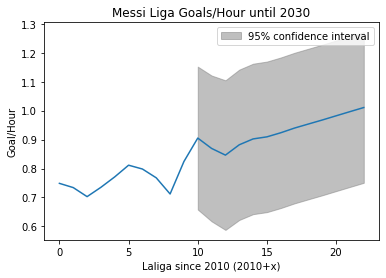

In [8]:
mod = AutoReg(ratio_messi*60,2, old_names=False,trend='ct',)

res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Messi Liga Goals/Hour until 2030')
plt.xlabel('Laliga since 2010 (2010+x)')
plt.ylabel('Goal/Hour')

In [ ]:
mod = AutoReg(ratio_ronaldo*60,2, old_names=False,trend='ct')

res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Ronaldo Liga Goals/Hour until 2030')
plt.xlabel('Laliga since 2010 (2010+x)')
plt.ylabel('Goal/Hour')

### Results of Autoregression (Laliga)
The graphs of the autoregs plot Ronaldo and Messi's Laliga goal/hour until the year 2030 (X axis plots years past the 2010 Laliga- x value of 5 means laLiga 2015, so on and so forth). Initially we have large jumps in the goal/hours for both players, but our autoreg function eventually evens it out to a linear progression as we get closer to the year 2030 and we see an overall performance trend for both players. Although both Ronaldo and Messi seem to increase their goals/hour, Messi seems to have a larger increase per year; therefore we can conclude that Lionel Messi will most likely have had scored the most number of goals in Laliga by 2030.

### Adding more Variables
To expand upon my project, I decided to add other factors and compare them to my original: Ronaldo and Messi. Firstly, I decided to compare both player's assists alongside their goals and also add a third player for each tournament I model. For Laliga, I decided to also plot data for Neymar Jr. 

In [ ]:
ronaldo_liga_assistR=player_info('Ronaldo','Laliga','assist')/player_info('Ronaldo','Laliga','Time')
messi_liga_assistR=player_info('Messi','Laliga','assist')/player_info('Messi','Laliga','Time')

mod = AutoReg(messi_liga_assistR*60,2, old_names=False,trend='ct',)
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Messi Liga Assists/Hour until 2030')
plt.xlabel('Laliga since 2010 (2010+x)')
plt.ylabel('Goal/Hour')



In [ ]:
mod = AutoReg(ronaldo_liga_assistR*60,2, old_names=False,trend='ct')
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Ronaldo Liga Assists/Hour until 2030')
plt.xlabel('Laliga since 2010 (2010+x)')
plt.ylabel('Goal/Hour')

We can conclude that Messi will have the most number of assists in Laliga if both players were to continue playing until the year 2030. 

## Neymar Jr (Laliga)


In [ ]:
neymar_liga_goals=neymar_stats('Laliga','Goals')/neymar_stats('Laliga','Minutes')


mod = AutoReg(neymar_liga_goals*60,1, old_names=False,trend='c')
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Neymar Liga Goals/Hour until 2030')
plt.xlabel('Laliga since 2010 (2010+x)')
plt.ylabel('Goal/Hour')

For Neymar's Laliga goals by the year 2030, the data was fairly limited as he only played for about 4 seasons. However, the data shows that he stays around consistent when it comes to his Goals/hour at around 0.42. Unlike Ronaldo and Messi, Neymar has no corellation of increased goals over the years; however, like mentioned before, because the data is extremely limited, it is hard to compare him to Ronaldo and Messi. This leads Neymar to hypothetically score more goals than Ronaldo in Laliga in his career.

# Champions League: Ronaldo V Messi

### Champions League Goals
We will now use our autoreg model above to predict goals/hours for Ronaldo and Messi again, but in the Champions League.

In [ ]:
CL_ratio_messi=player_info('Messi','Champions League','goal')/player_info('Messi','Champions League','Time')
CL_ratio_ronaldo=player_info('Ronaldo','Champions League','goal')/player_info('Ronaldo','Champions League','Time')

mod = AutoReg(CL_ratio_messi*60,3, old_names=False,trend='ct',)
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Messi Champions League Goals/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Goal/Hour')


In [ ]:
mod = AutoReg(CL_ratio_ronaldo*60,3, old_names=False,trend='ct',)
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Ronaldo Champions League Goals/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Goal/Hour')


### Neymar Jr Goals (Champions League)

In [ ]:
CL_ratio_neymar=neymar_stats('Champions League','Goals')/neymar_stats('Champions League','Minutes')

mod = AutoReg(CL_ratio_neymar*60,2, old_names=False,trend='ct',)
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Neymar Champions League Goals/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Goal/Hour')


### Champions League Assists

In [ ]:
CL_ratio_messi_assist=player_info('Messi','Champions League','assist')/player_info('Messi','Champions League','Time')
CL_ratio_ronaldo_assist=player_info('Ronaldo','Champions League','assist')/player_info('Ronaldo','Champions League','Time')

mod = AutoReg(CL_ratio_messi_assist*60,3, old_names=False,trend='ct')
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Messi Champions League Assists/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Assists/Hour')



In [ ]:
mod = AutoReg(CL_ratio_ronaldo_assist*60,3, old_names=False,trend='ct')
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Ronaldo Champions League Assists/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Assists/Hour')



### Neymar Jr Assists (Champions League)

In [ ]:
CL_ratio_neymar_assist=neymar_stats('Champions League','Assists')/neymar_stats('Champions League','Minutes')

mod = AutoReg(CL_ratio_neymar_assist*60,1, old_names=False,trend='ct')
res = mod.fit()
fig=res.plot_predict(0, 24)
plt.title('Neymar Champions League Assists/Hour until 2030')
plt.xlabel('Champions League since 2010 (2010+x)')
plt.ylabel('Assists/Hour')


### Results of Champions League
In the Champions League, my models predict that Ronaldo will hypothetically outperform Messi in both assists and goals at the year 2030. In regards to goals, Ronaldo's Champions League (CL) performance is more sporadic, but has a tighter 95% confidence interval, while Messi has a more linear/predictable trend, but a more generous confidence interval. Because of Ronaldo's tighter confidence interval in the CL, I can accurately say that Ronaldo is predicted to perform better than Messi in the Champions League.

When compared to Neymar Jr, both Ronaldo and Messi still have the higher overall number of goals and assists by Champions League 2030. Despite this, Neymar's predicted goals seem to be the most steady compared to the other two and have a higher slope. I think if the data was extrapolated even further, this would result in Neymar having the highest number of career goals in the Champions League (if possible, as both Ronaldo and Messi would have retired by then).

## Conclusion
By the end of my project, I have learned how to utilize Python's Autoreg and curve fitting functions to predict future data points. I had initially used curve fitting, but due to both the limited data set and it's non correlative characteristics, I had to use the Autoreg function from the statsmodel library instead. The Autoreg function did a better job of taking into account lag and previous values in time to give a far more accurate trend line as using curve fit would often lead to trend lines reaching zero. 

From my data, I can conclude that in Laliga, Messi would have scored the most number of goals and assists, followed by Neymar (model predicts he stays relatively constant) and Ronaldo in last.

In the Champions League, however, Ronaldo will have scored the most number of goals, followed by Messi and then Neymar. Messi will have had the most number of assists in the Champions League, then Ronaldo and then Neymar. 


### References

- https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html
- All CSV data was made using data from www.transfermarkt.us
